In [108]:
import random as rnd

class bandit_machine:
    def __init__(self, name, probability):
        """
        Contructor to create a bandit machine
        """
        self.name = name
        self.p = probability
        self.p_estimated = 0
        self.p_estimated_cache = [0]

    def pull(self):
        return int(rnd.random() < self.p)

    def update(self, x):
        self.p_estimated = (self.p_estimated + x) / 2
        self.p_estimated_cache.append(self.p_estimated)


In [109]:
from matplotlib import pyplot as plt

def plot_function(x_values, y_values):
    plt.plot(x_values, y_values, '-') # added '-o' to join the points
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.title("Plot of the Function")
    plt.show()

In [110]:
# Create the machine
machine_test = bandit_machine('test_machine' ,0.75)

# Test the machine by pulling the arm
print(machine_test.name, machine_test.pull())

test_machine 1


machine_0
0.3517458161810202
machine_1
0.9916838405347279
machine_2
0.4998168674860588


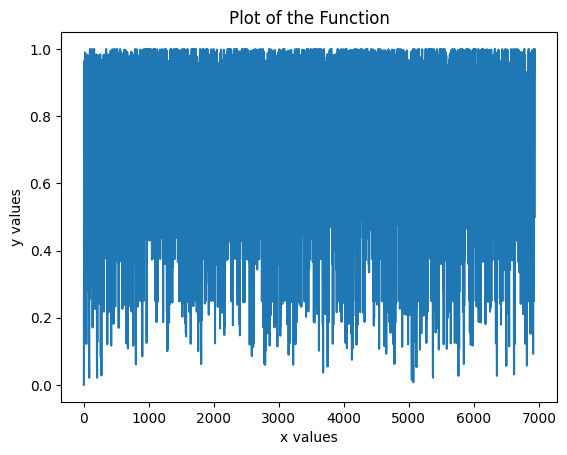

In [111]:
# Create the machines
probabilities = [0.35, 0.6, 0.75]
machines = [bandit_machine(f'machine_{i}', p) for i, p in enumerate(probabilities)]

# Initial parameters
n_experiments = 10000
epsilon = 0.1

# Experiment
for i in range(n_experiments):
    # Select the machine to run
    if rnd.random() < epsilon: # Explore action
        selected_machine = machines[rnd.randint(0,2)]
    else:
        best_estimation = max([m.p_estimated for m in machines])
        selected_machine = [m for m in machines if m.p_estimated == best_estimation][0]

    # Pull the machine
    reward = selected_machine.pull()
    selected_machine.update(reward)


# Plot results
estimated_cache = {}
for m in machines:
    print(m.name)
    print(m.p_estimated)
    estimated_cache[m.name] = m.p_estimated_cache

x_points = list(range(len(estimated_cache['machine_2'])))
plot_function(x_points, estimated_cache['machine_2'])